### EDA_Accesos_tecnologia_localidad.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país. Esta información permite evaluar el estado y la evolución del acceso a 
internet en Argentina.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Accesos a internet por tipo de tecnología y localidad."**, que proporciona 
información detallada sobre el estado de los accesos a internet en el país.

### Objetivo del Análisis
El propósito de este análisis es **explorar y visualizar los datos** para identificar tendencias, patrones y posibles 
anomalías en la información. Se aplicarán métodos de **Análisis Exploratorio de Datos (EDA)** para obtener insights 
valiosos.

In [1]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Accesos_tecnologia_localidad.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [2]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Provincia', 'Partido', 'Localidad', 'Tecnología', 'Link indec', 'Accesos']


In [3]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincia   7753 non-null   object
 1   Partido     7753 non-null   object
 2   Localidad   7753 non-null   object
 3   Tecnología  7753 non-null   object
 4   Link indec  7753 non-null   int64 
 5   Accesos     7753 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 363.6+ KB
None
      Provincia     Partido   Localidad    Tecnología  Link indec  Accesos
0  BUENOS AIRES  25 DE MAYO  25 DE MAYO          ADSL     6854100      755
1  BUENOS AIRES  25 DE MAYO  25 DE MAYO    CABLEMODEM     6854100     4600
2  BUENOS AIRES  25 DE MAYO  25 DE MAYO  FIBRA OPTICA     6854100        2
3  BUENOS AIRES  25 DE MAYO  25 DE MAYO     SATELITAL     6854100      742
4  BUENOS AIRES  25 DE MAYO  25 DE MAYO      WIRELESS     6854100      727


In [4]:
import numpy as np

# 📌 Reemplazar valores problemáticos en todas las columnas
df.replace({'Sin Dato': np.nan, 'Sin Datos': np.nan, 'SIN DATO': np.nan}, inplace=True)

# 📌 Verificar valores problemáticos en 'Link indec'
print("Valores únicos en 'Link indec' antes de la conversión:")
print(df['Link indec'].unique())

# 📌 Verificar y cambiar el tipo de dato de las columnas
conversiones = {
    'Link indec': 'int64',
    'Accesos': 'int64'
}

for columna, tipo in conversiones.items():
    if columna in df.columns:
        try:
            df[columna] = pd.to_numeric(df[columna], errors='coerce')  # Convertir a numérico, forzando NaN en errores
            df[columna] = df[columna].fillna(0).astype(tipo)  # Reemplazar NaN con 0 y convertir a int64
            print(f"La columna '{columna}' ha sido convertida a {tipo}.")
        except ValueError as e:
            print(f"No se pudo convertir la columna '{columna}' a {tipo} debido a un error: {e}")
    else:
        print(f"La columna '{columna}' no existe en el DataFrame.")


Valores únicos en 'Link indec' antes de la conversión:
[ 6854100  6854020  6854030 ... 90112030 90119020 90119030]
La columna 'Link indec' ha sido convertida a int64.
La columna 'Accesos' ha sido convertida a int64.


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincia   7753 non-null   object
 1   Partido     7753 non-null   object
 2   Localidad   7753 non-null   object
 3   Tecnología  7753 non-null   object
 4   Link indec  7753 non-null   int64 
 5   Accesos     7753 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 363.6+ KB
None


In [6]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [7]:
# 📌 Verificar nombres únicos de provincias antes de la normalización
provincias_unicas = df['Provincia'].unique()
print("🔹 Provincias encontradas antes de normalización:")
print(provincias_unicas)

🔹 Provincias encontradas antes de normalización:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']


In [8]:
# 📌 Verificar nombres únicos de localidades antes de la normalización
localidades_unicas = df['Localidad'].unique()
print("🔹 Localidades encontradas antes de normalización:")
print(localidades_unicas)

🔹 Localidades encontradas antes de normalización:
['25 DE MAYO' 'DEL VALLE' 'ERNESTINA' ... 'VILLA  DE TRANCAS'
 'VILLA CARMELA' 'YERBA BUENA - MARCOS PAZ']


In [9]:
# 📌 Verificar nombres únicos de partidos antes de la normalización
partidos_unicos = df['Partido'].unique()
print("🔹 Partidos encontrados antes de normalización:")
print(partidos_unicos)

🔹 Partidos encontrados antes de normalización:
['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'AMBA' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO'
 'AZUL' 'BAHÍA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUÁREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLÍVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITÁN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMÚS' 'CHIVILCOY' 'COLÓN'
 'CORONEL DE MARINA L. ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUÁREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRÍA' 'EXALTACIÓN DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARELA'
 'FLORENTINO AMEGHINO' 'GENERAL ALVARADO' 'GENERAL ARENALES'
 'GENERAL BELGRANO' 'GENERAL GUIDO' 'GENERAL JUAN MADARIAGA'
 'GENERAL LA MADRID' 'GENERAL LAS HERAS' 'GENERAL LAVALLE' 'GENERAL PAZ'
 'GENERAL PINTO' 'GENERAL PUEYRREDÓN' 'GENERAL RODRÍGUEZ'
 'GENERAL SAN MARTÍN' 'GENERAL VIAMONTE' 'GENERAL VILLEGAS' 'GUAMINÍ'
 'HIPÓLITO YRIGOYEN'

In [10]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']

Valores únicos en 'Partido' después de los reemplazos:
['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'AMBA' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO'
 'AZUL' 'BAHÍA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUÁREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLÍVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITÁN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMÚS' 'CHIVILCOY' 'COLÓN'
 'CORONEL DE MARINA L. ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUÁREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRÍA' 'EXALTACIÓN DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARE

In [11]:
import sweetviz as sv
from skimpy import skim

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincia   7753 non-null   object
 1   Partido     7753 non-null   object
 2   Localidad   7753 non-null   object
 3   Tecnología  7753 non-null   object
 4   Link indec  7753 non-null   int64 
 5   Accesos     7753 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 363.6+ KB
None
      Provincia     Partido   Localidad    Tecnología  Link indec  Accesos
0  BUENOS AIRES  25 DE MAYO  25 DE MAYO          ADSL     6854100      755
1  BUENOS AIRES  25 DE MAYO  25 DE MAYO    CABLEMODEM     6854100     4600
2  BUENOS AIRES  25 DE MAYO  25 DE MAYO  FIBRA OPTICA     6854100        2
3  BUENOS AIRES  25 DE MAYO  25 DE MAYO     SATELITAL     6854100      742
4  BUENOS AIRES  25 DE MAYO  25 DE MAYO      WIRELESS     6854100      727


In [13]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7753   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA  ┃ NA %  ┃ mean      ┃ sd        ┃ p0 ┃ p25     ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Link indec  │   0 │     0 │  36700000 │  30110000 │  0 │ 6728000 │ 26090000 │ 66040000 │ 94010000 │ ▇▂▂▂▂▃ │  │
│ │ Accesos     │   0 │     0 │      1491 │     15200 │  0 │       3 │       58 │      400 │  1145000 │   ▇    │  │
│ └─────────────┴─────┴───────┴───────────┴───────────┴────┴─────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃          ┃           ┃            ┃           ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest ┃ longest   ┃ min        ┃ max       ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ Provincia │  0 │    0 │ CABA     │ SANTIAGO  │ BUENOS     │ TUCUMÁN   │      9.37 │        1.7 │     12944 │  │
│ │           │    │      │          │ DEL       │ AIRES      │           │           │            │           │  │
│ │           │    │      │          │ ESTERO    │            │           │           │            │           │  │
│ │ Partido   │  0 │    0 │ AMBA     │ CIUDAD    │ 12 DE      │ ÑORQUÍN   │      10.2 │        1.6 │     12712 │  │
│ │           │    │      │          │ AUTÓNOMA  │ OCTUBRE    │           │           │            │           │  │
│ │           │    │      │          │ DE BUENOS │            │           │           │            │           │  │
│ │           │    │      │          │ AIRES     │            │           │           │            │           │  │
│ │ Localidad │  0 │    0 │ MAZA     │ DIAGONAL  │ 11 DE      │ ÑORQUINCÓ │      12.2 │          2 │     15487 │  │
│ │           │    │      │          │ NORTE -   │ OCTUBRE    │           │           │            │           │  │
│ │           │    │      │          │ LUZ Y     │            │           │           │            │           │  │
│ │           │    │      │          │ FUERZA -  │            │           │           │            │           │  │
│ │           │    │      │          │ LOS       │            │           │           │            │           │  │
│ │           │    │      │          │ POCITOS - │            │           │           │            │           │  │
│ │           │    │      │          │ VILLA     │            │           │           │            │           │  │
│ │           │    │      │          │ NUEVA     │      


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
           Provincia    Partido Localidad Tecnología    Link indec  \
count           7753       7753      7753       7753  7.753000e+03   
unique            24        432      2788         10           NaN   
top     BUENOS AIRES  SAN JUSTO     OTROS   WIRELESS           NaN   
freq            2313        136        76       2223           NaN   
mean             NaN        NaN       NaN        NaN  3.669881e+07   
std              NaN        NaN       NaN        NaN  3.010589e+07   
min              NaN        NaN       NaN        NaN  0.000000e+00   
25%              NaN        NaN       NaN        NaN  6.728010e+06   
50%              NaN        NaN       NaN        NaN  2.609102e+07   
75%              NaN        NaN       NaN        NaN  6.604201e+07   
max              NaN        NaN       NaN        NaN  9.401402e+07   

             Accesos  
count   7.753000e+03  
unique           NaN  
top             

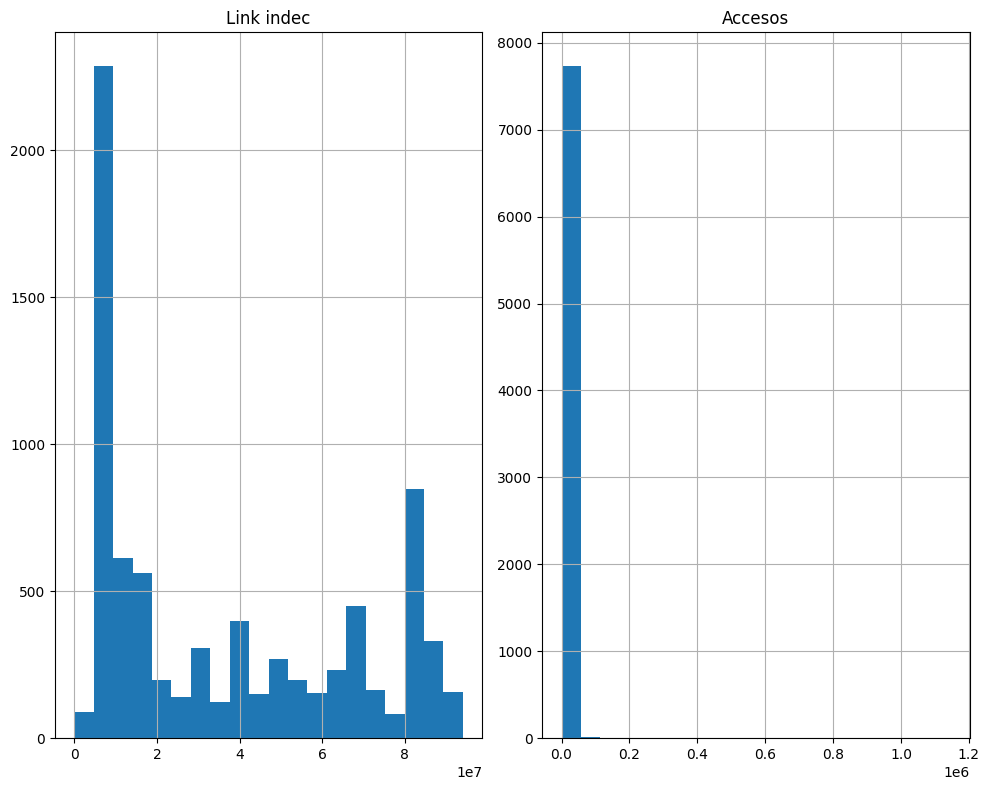

In [14]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
            Link indec  Accesos
Link indec     1.00000 -0.03843
Accesos       -0.03843  1.00000


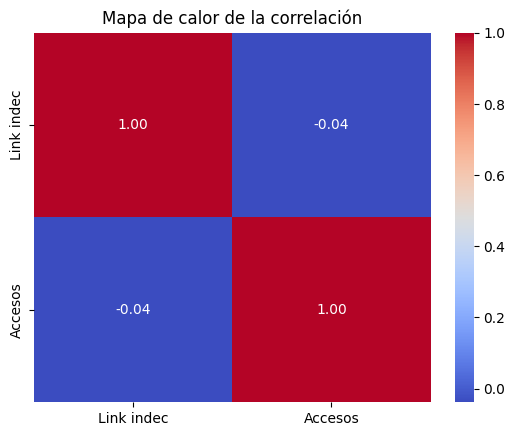

In [15]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [16]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Partido:
Partido              12 DE OCTUBRE  1º DE MAYO  2 DE ABRIL  25 DE MAYO  \
Provincia                                                                
BUENOS AIRES                     0           0           0          19   
CABA                             0           0           0           0   
CATAMARCA                        0           0           0           0   
CHACO                            9           7           5           5   
CHUBUT                           0           0           0           0   
CORRIENTES                       0           0           0           0   
CÓRDOBA                          0           0           0           0   
ENTRE RÍOS                       0           0           0           0   
FORMOSA                          0           0           0           0   
JUJUY                            0           0           0           0   
LA PAMPA                         0           0           0     

In [17]:
from scipy.stats import chi2_contingency
import numpy as np

# Crear una tabla de contingencia entre 'Tecnologia' y 'Accesos'
tabla_contingencia = pd.crosstab(df['Tecnología'], df['Accesos'])

# Calcular el estadístico chi2, los grados de libertad y los valores esperados
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

# Calcular el coeficiente de correlación de Cramér
n = tabla_contingencia.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(tabla_contingencia.shape) - 1)))

print(f"Coeficiente de correlación de Cramér entre 'Tecnologia' y 'Accesos': {cramers_v:.4f}")

Coeficiente de correlación de Cramér entre 'Tecnologia' y 'Accesos': 0.5842


dividir la celda para realizar análisis por partes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [ ]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)

In [ ]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


Error: El archivo 'path_to_shapefile/argentina_provincias.shp' no existe.


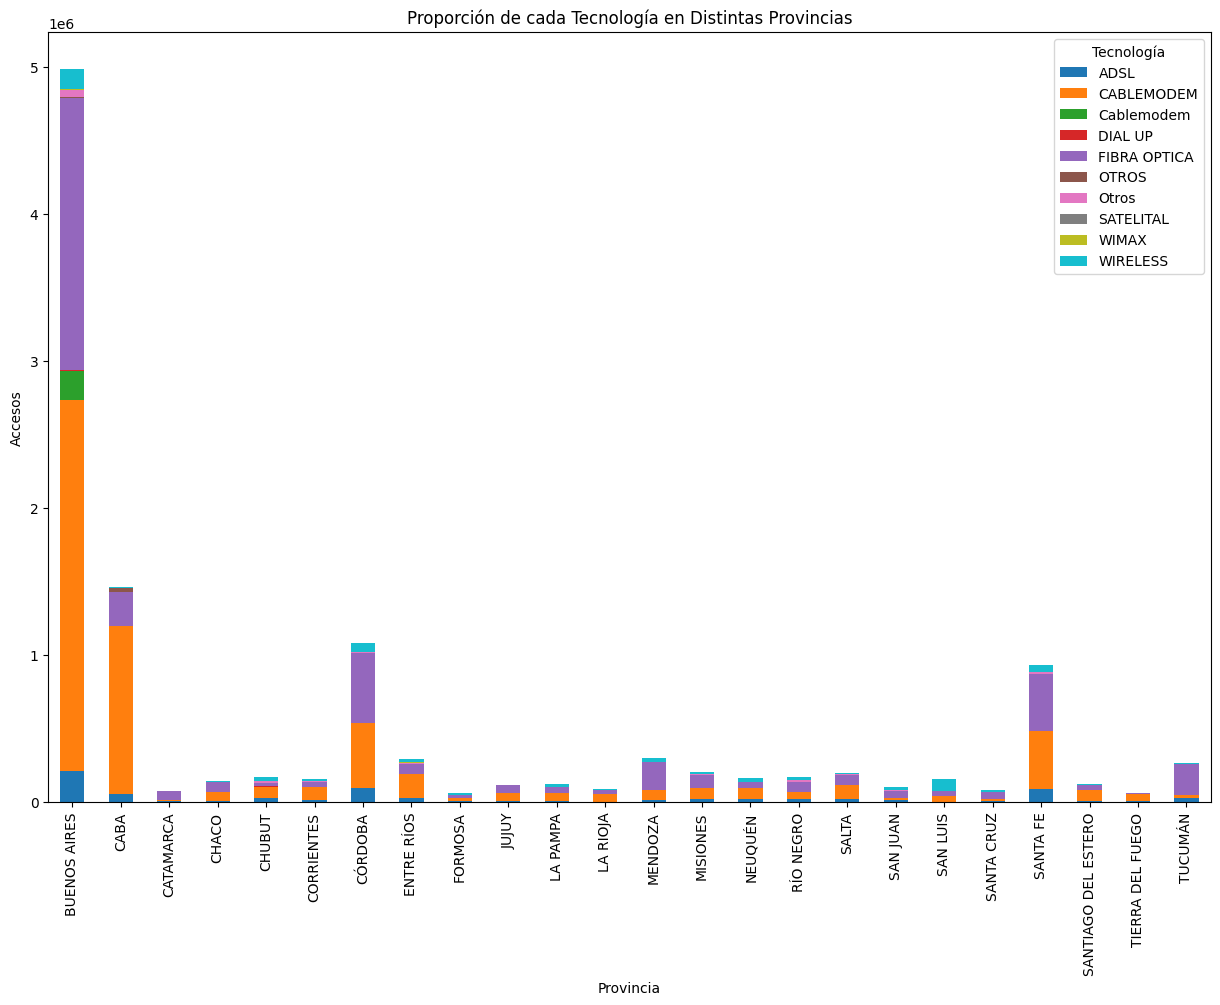

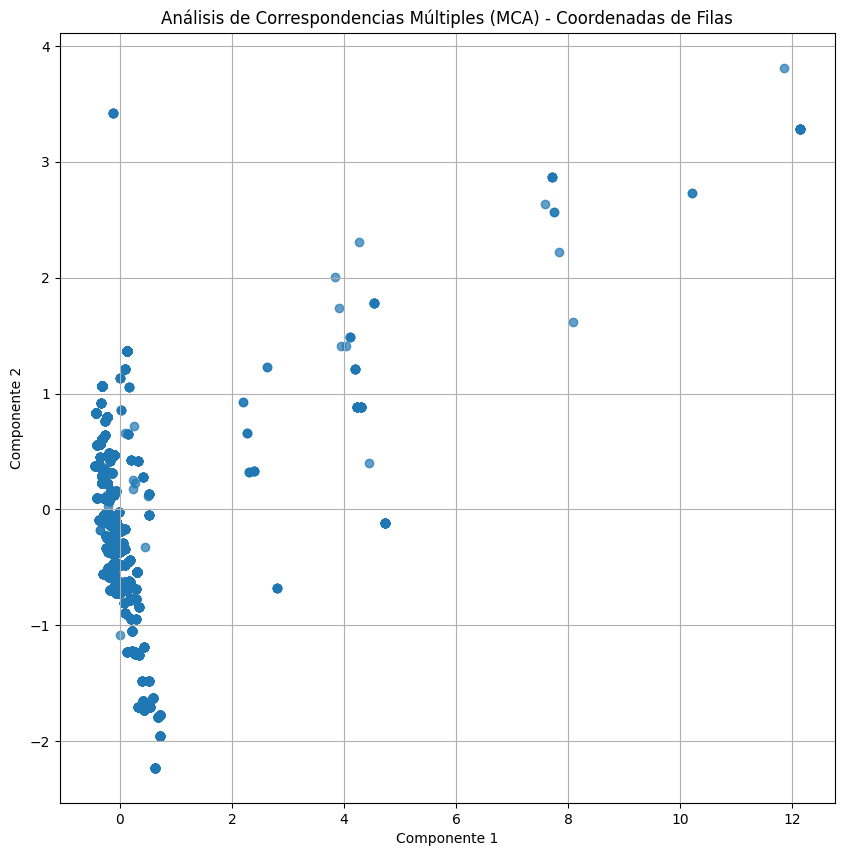

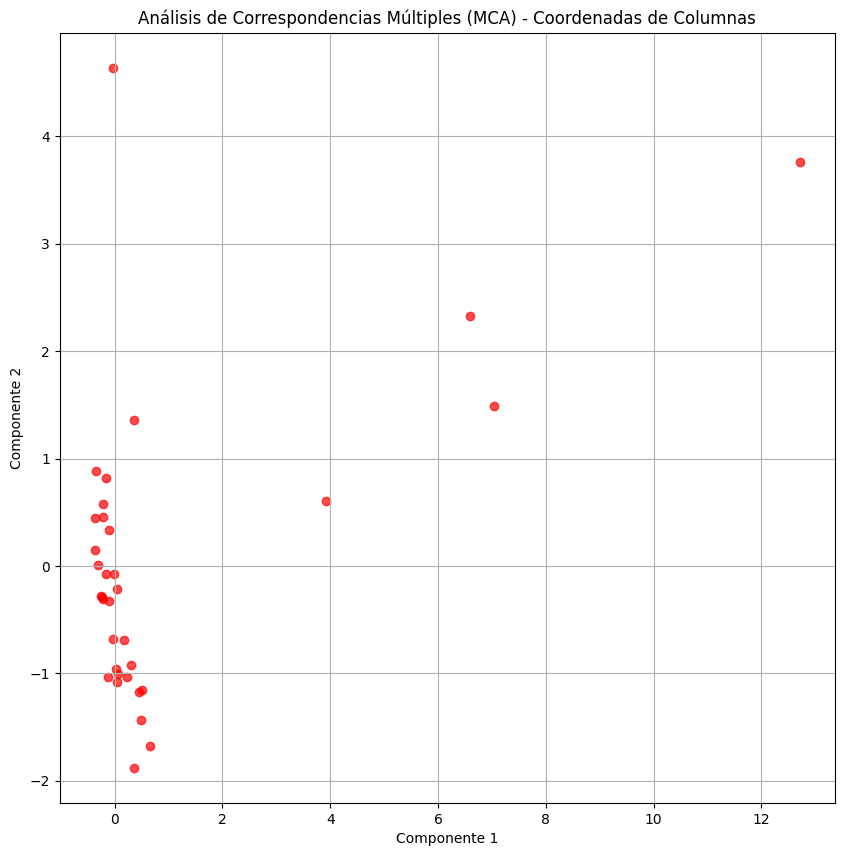

In [24]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from prince import MCA
import os

# 📌 1. Verificar y cargar shapefile
shapefile_path = 'path_to_shapefile/argentina_provincias.shp'

if os.path.exists(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    print("Shapefile cargado exitosamente.")
    
    # Agrupar los datos por provincia y tecnología
    df_grouped = df.groupby(['Provincia', 'Tecnología']).agg({'Accesos': 'sum'}).reset_index()

    # Crear un DataFrame pivotado para el heatmap
    df_pivot = df_grouped.pivot(index='Provincia', columns='Tecnología', values='Accesos').fillna(0)

    # Unir el GeoDataFrame con el DataFrame pivotado
    gdf = gdf.merge(df_pivot, left_on='provincia_name', right_on='Provincia')

    # Plotear el mapa geográfico
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    gdf.plot(column='Accesos', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title('Distribución de Accesos por Provincia y Tecnología')
    plt.show()
else:
    print(f"Error: El archivo '{shapefile_path}' no existe.")

# 📌 2. Gráfico de barras apiladas
df_grouped_pivot = df_grouped.pivot(index='Provincia', columns='Tecnología', values='Accesos').fillna(0)
df_grouped_pivot.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Proporción de cada Tecnología en Distintas Provincias')
plt.xlabel('Provincia')
plt.ylabel('Accesos')
plt.legend(title='Tecnología')
plt.show()

# 📌 3. Análisis de Correspondencias Múltiples (MCA)
# Codificar las variables categóricas
le = LabelEncoder()
df['Provincia_encoded'] = le.fit_transform(df['Provincia'])
df['Tecnología_encoded'] = le.fit_transform(df['Tecnología'])

# Aplicar MCA
mca = MCA(n_components=2)
mca_results = mca.fit(df[['Provincia_encoded', 'Tecnología_encoded']])

# 📌 Obtener coordenadas de filas y columnas para graficar manualmente
rows_coords = mca.row_coordinates(df[['Provincia_encoded', 'Tecnología_encoded']])
columns_coords = mca.column_coordinates(df[['Provincia_encoded', 'Tecnología_encoded']])

# 📌 Graficar las coordenadas de las filas
plt.figure(figsize=(10, 10))
plt.scatter(rows_coords[0], rows_coords[1], alpha=0.7)
plt.title('Análisis de Correspondencias Múltiples (MCA) - Coordenadas de Filas')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

# 📌 Graficar las coordenadas de las columnas
plt.figure(figsize=(10, 10))
plt.scatter(columns_coords[0], columns_coords[1], alpha=0.7, color='red')
plt.title('Análisis de Correspondencias Múltiples (MCA) - Coordenadas de Columnas')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()


In [26]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           2313
CÓRDOBA                 889
SANTA FE                852
SANTIAGO DEL ESTERO     334
SALTA                   322
ENTRE RÍOS              310
MENDOZA                 272
LA PAMPA                237
RÍO NEGRO               234
CHACO                   201
MISIONES                201
CORRIENTES              168
SAN LUIS                166
JUJUY                   166
NEUQUÉN                 155
LA RIOJA                152
CHUBUT                  140
TUCUMÁN                 140
SAN JUAN                134
CATAMARCA               130
FORMOSA                 127
SANTA CRUZ               81
TIERRA DEL FUEGO         22
CABA                      7
Name: count, dtype: int64

Conteo de categorías en la columna 'Partido':
Partido
SAN JUSTO                   136
CAPITAL                     124
GENERAL SAN MARTÍN          118
COLÓN                       100
GENERAL ROCA                 94
                           .

In [27]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


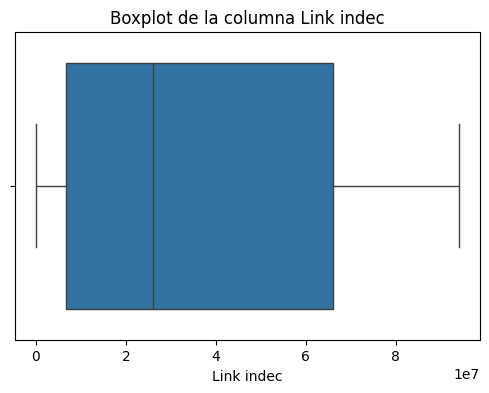

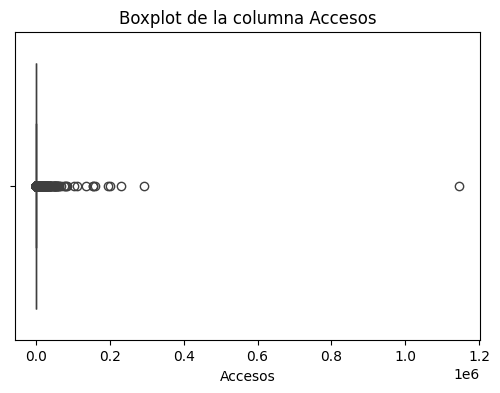

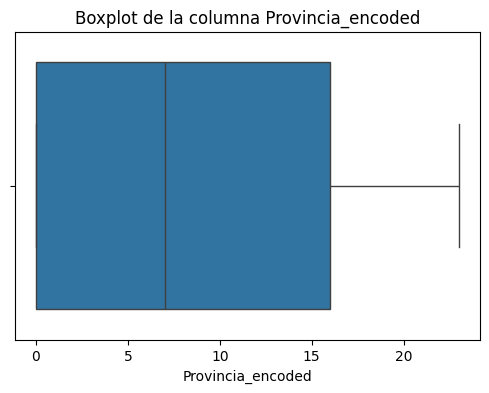

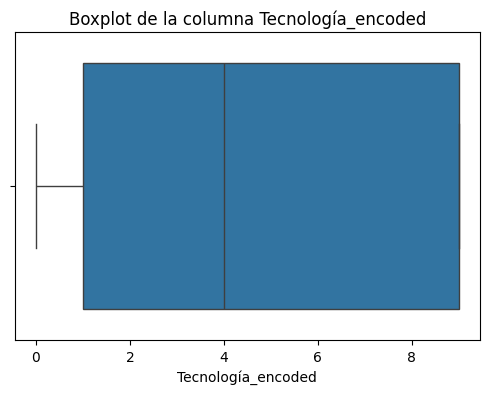

In [28]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [29]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Provincia             0
Partido               0
Localidad             0
Tecnología            0
Link indec            0
Accesos               0
Provincia_encoded     0
Tecnología_encoded    0
dtype: int64


In [30]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Accesos_tecnologia_localidad.csv


In [31]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Link indec             0.453093
Accesos               57.668455
Provincia_encoded      0.327913
Tecnología_encoded    -0.197906
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Link indec              -1.367028
Accesos               4171.230865
Provincia_encoded       -1.332493
Tecnología_encoded      -1.359051
dtype: float64


In [32]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
             Variable        VIF
0               const   4.738842
1          Link indec  19.660760
2             Accesos   1.006714
3   Provincia_encoded  19.697437
4  Tecnología_encoded   1.014667


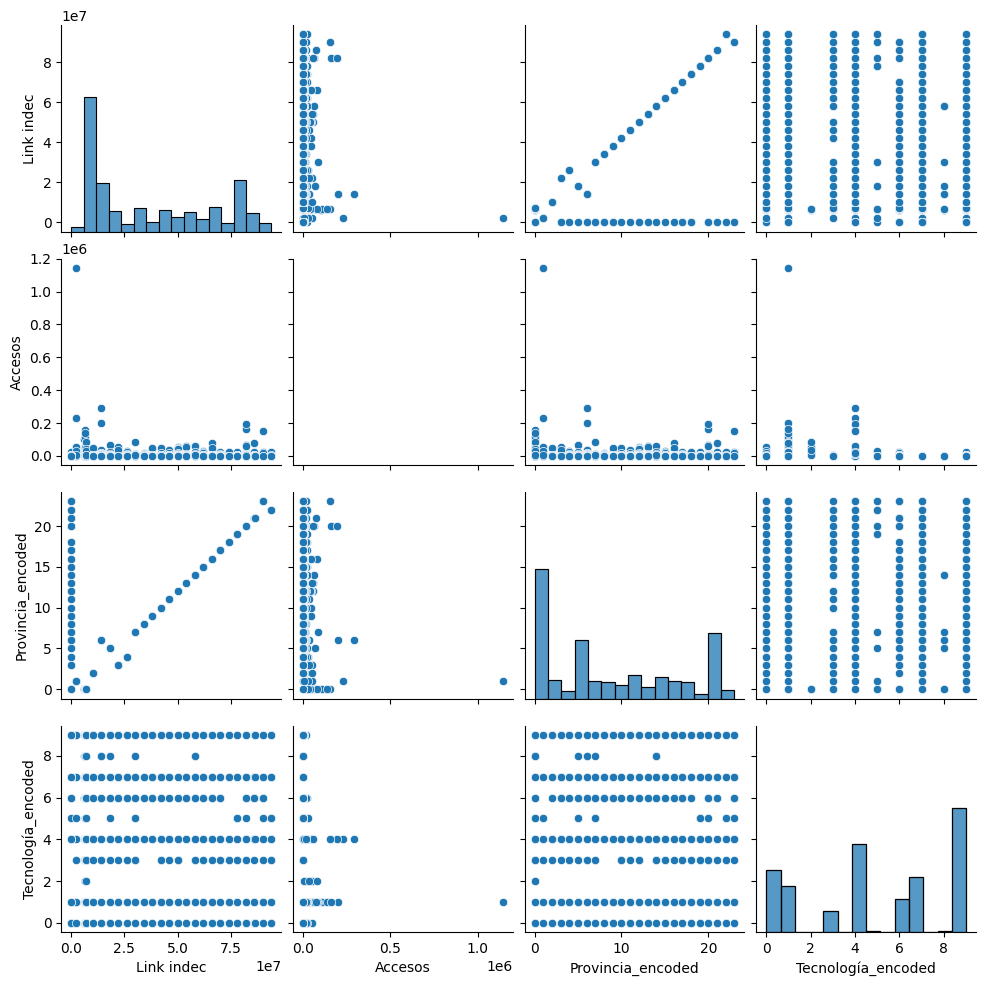

In [33]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [34]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                    Link indec                                          \
                         count          mean           std         min   
Provincia                                                                
BUENOS AIRES            2313.0  6.380515e+06  7.245484e+05         0.0   
CABA                       7.0  2.000010e+06  0.000000e+00   2000010.0   
CATAMARCA                130.0  1.006285e+07  3.174929e+04  10007030.0   
CHACO                    201.0  2.175002e+07  2.684321e+06         0.0   
CHUBUT                   140.0  2.586537e+07  2.201951e+06         0.0   
CORRIENTES               168.0  1.797880e+07  1.396176e+06         0.0   
CÓRDOBA                  889.0  1.395115e+07  1.412634e+06         0.0   
ENTRE RÍOS               310.0  2.967441e+07  3.398391e+06         0.0   
FORMOSA                  127.0  3.323107e+07  5.189349e+06         0.0   
JUJUY                    166.0  3.759573e+07  4.164429e+06         0.0  

In [35]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Provincia':
                       Link indec        Accesos  Provincia_encoded  \
Provincia                                                             
BUENOS AIRES         6.380515e+06    2157.103329                0.0   
CABA                 2.000010e+06  209085.571429                1.0   
CATAMARCA            1.006285e+07     577.492308                2.0   
CHACO                2.175002e+07     731.800995                3.0   
CHUBUT               2.586537e+07    1244.450000                4.0   
CORRIENTES           1.797880e+07     931.398810                5.0   
CÓRDOBA              1.395115e+07    1221.343082                6.0   
ENTRE RÍOS           2.967441e+07     949.390323                7.0   
FORMOSA              3.323107e+07     495.669291                8.0   
JUJUY                3.759573e+07     720.987952                9.0   
LA PAMPA             4.190625e+07     520.097046               10.0   
LA RIOJA             4.575446e+07    

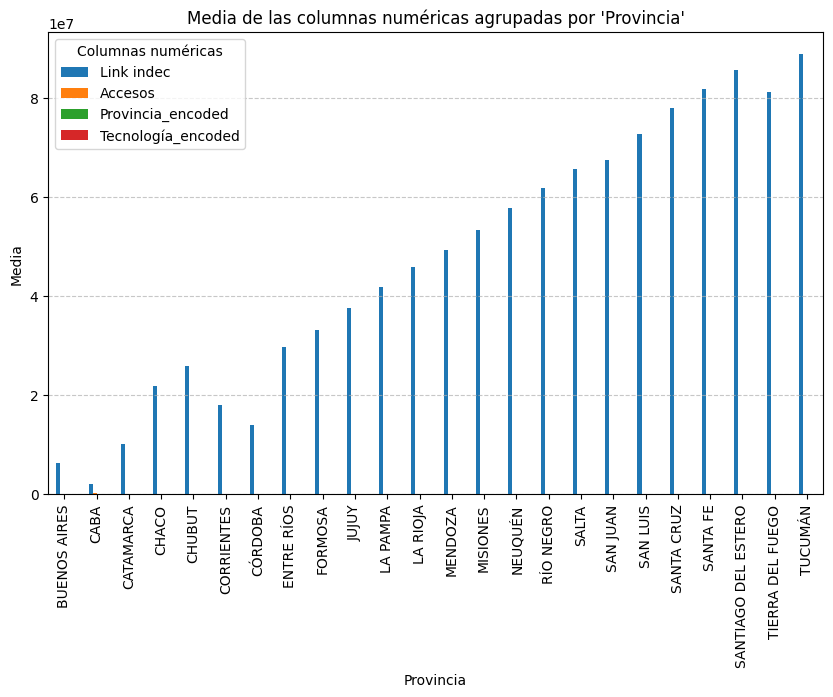


Estadísticas por grupo de 'Partido':
                 Link indec      Accesos  Provincia_encoded  \
Partido                                                       
12 DE OCTUBRE  2.203602e+07   105.666667           3.000000   
1º DE MAYO     2.212602e+07   101.857143           3.000000   
2 DE ABRIL     2.203901e+07   160.600000           3.000000   
25 DE MAYO     4.087684e+07   232.555556           9.174603   
9 DE JULIO     4.983674e+07   384.368421          11.807018   
...                     ...          ...                ...   
ZAPALA         5.811203e+07   633.300000          14.000000   
ZONDA          7.013301e+07   386.000000          17.000000   
ZÁRATE         6.882045e+06  3215.300000           0.000000   
ÑORQUINCÓ      6.205603e+07     3.333333          15.000000   
ÑORQUÍN        5.808403e+07    68.333333          14.000000   

               Tecnología_encoded  
Partido                            
12 DE OCTUBRE            5.888889  
1º DE MAYO               4.714286 

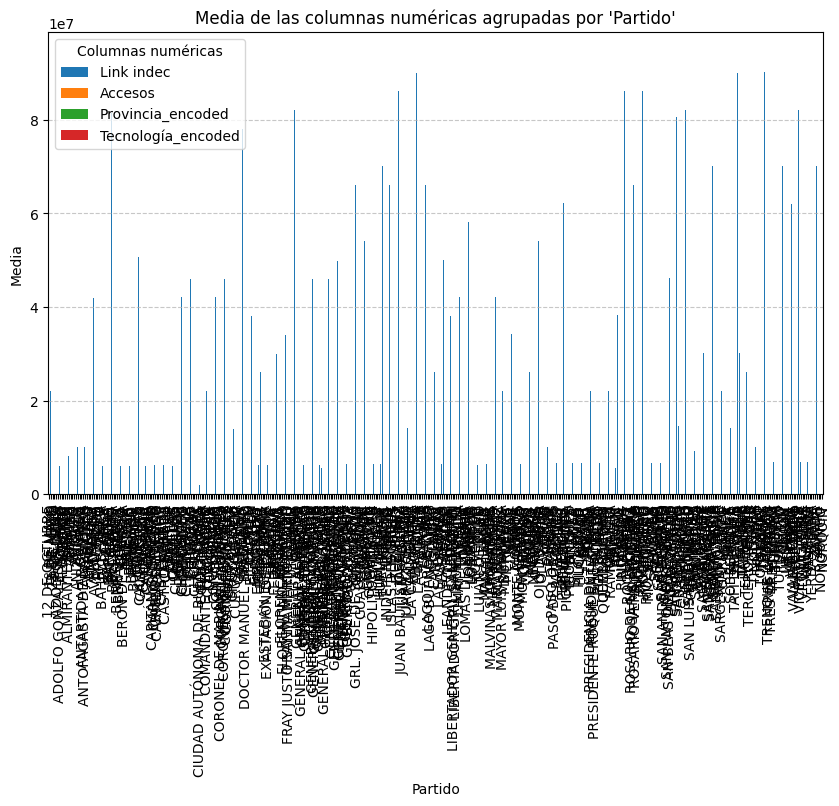


Estadísticas por grupo de 'Localidad':
                  Link indec  Accesos  Provincia_encoded  Tecnología_encoded
Localidad                                                                   
11 DE OCTUBRE     58035080.0   225.00               14.0                2.00
11 DE SEPTIEMBRE   6840010.0   324.75                0.0                2.75
12 DE OCTUBRE      6588030.0    19.00                0.0                9.00
1º DE MAYO        30098090.0   139.00                7.0                9.00
20 DE JUNIO        6427010.0   373.00                0.0                3.40
...                      ...      ...                ...                 ...
ZÁRATE             6882050.0  5195.50                0.0                4.50
ÁLVAREZ           82084030.0   383.00               20.0                2.75
ÁRRAGA            86189010.0    21.75               21.0                5.00
ÑANDUCITA         82091200.0    37.00               20.0                9.00
ÑORQUINCÓ         62056030.0     7.0

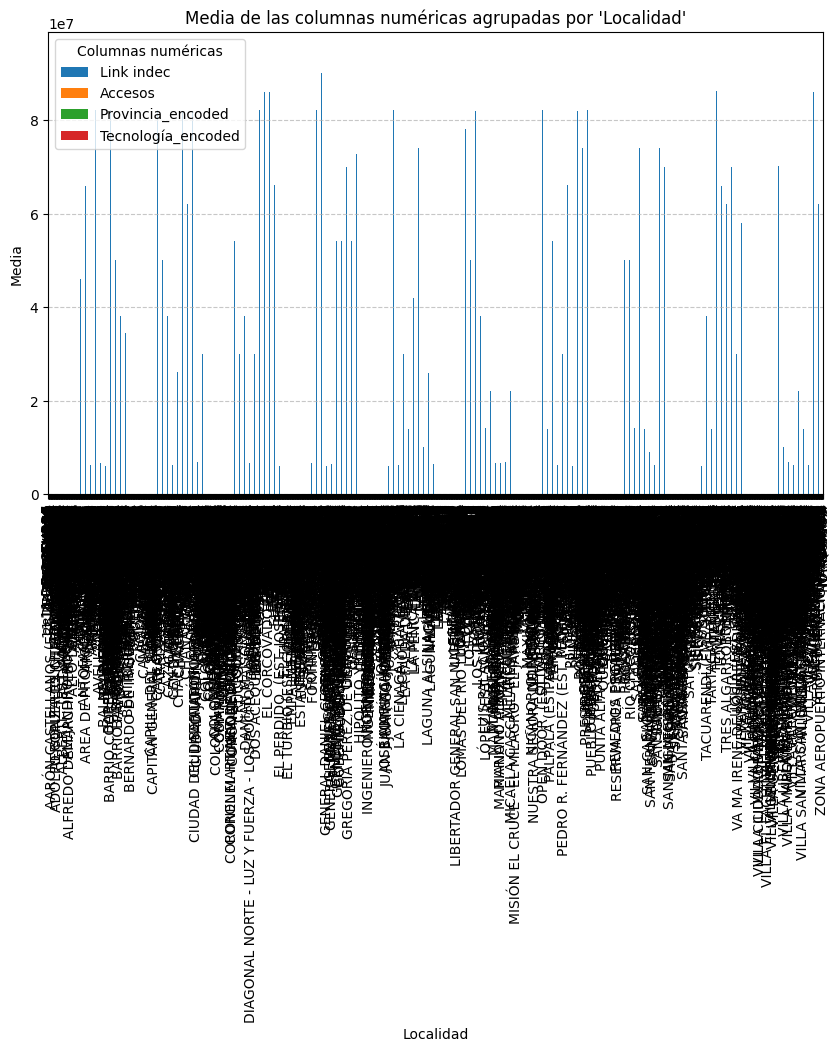


Estadísticas por grupo de 'Tecnología':
                Link indec       Accesos  Provincia_encoded  \
Tecnología                                                    
ADSL          3.572034e+07    662.593496           8.506775   
CABLEMODEM    3.318976e+07   6792.461631           7.627098   
Cablemodem    6.539858e+06  33765.166667           0.000000   
DIAL UP       2.422848e+07     31.364362           4.819149   
FIBRA OPTICA  3.639618e+07   2645.912437           8.585660   
OTROS         5.774526e+07   1322.666667          13.814815   
Otros         3.351283e+07    233.306533           8.209380   
SATELITAL     4.155244e+07      2.950655          10.050352   
WIMAX         2.113940e+07    159.857143           4.714286   
WIRELESS      3.943763e+07    266.845254           9.517319   

              Tecnología_encoded  
Tecnología                        
ADSL                         0.0  
CABLEMODEM                   1.0  
Cablemodem                   2.0  
DIAL UP                    

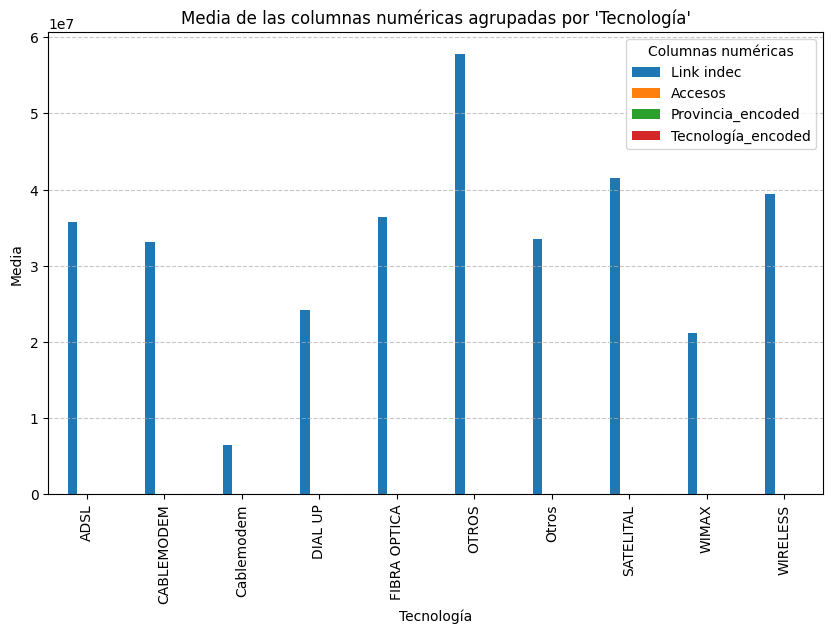

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



# Análisis de Datos con Pandas y Visualización

Este Jupyter Notebook realiza un análisis exhaustivo de un conjunto de datos utilizando `pandas` para la manipulación de datos y `seaborn` y `matplotlib` para la visualización.

## Contenido del Notebook

1. **Carga y Normalización de Datos**
    - Carga de un archivo CSV y normalización de nombres de columnas.
    - Verificación y conversión de tipos de datos.

2. **Reemplazo de Variaciones Específicas**
    - Reemplazo de variaciones específicas en las columnas `Provincia`, `Partido` y `Localidad`.

3. **Estadísticas Descriptivas y Análisis Exploratorio**
    - Generación de estadísticas descriptivas.
    - Visualización de histogramas y mapas de calor de correlación.

4. **Análisis de Correlación**
    - Cálculo y visualización de la matriz de correlación para columnas numéricas.
    - Tablas de contingencia y mapas de calor para columnas categóricas.

5. **Cálculo de Z-scores**
    - Cálculo y visualización de Z-scores para columnas numéricas.

6. **Análisis de Valores Negativos**
    - Identificación y reemplazo de valores negativos por NaN.
    - Visualización de distribuciones y conteo de valores negativos.

7. **Análisis de Distribuciones**
    - Cálculo de skewness (asimetría) y kurtosis (curtosis) para columnas numéricas.

8. **Verificación de Multicolinealidad**
    - Cálculo del Factor de Inflación de la Varianza (VIF) para detectar multicolinealidad.

9. **Visualización de Relaciones entre Variables**
    - Visualización de relaciones entre variables numéricas utilizando pairplot.

10. **Agrupamiento por Categorías**
     - Cálculo y visualización de estadísticas agrupadas por columnas categóricas.

11. **Verificación de Duplicados**
     - Conteo de filas duplicadas en el DataFrame.

## Requisitos

- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `scipy`
- `statsmodels`

## Uso

Para ejecutar este notebook, asegúrate de tener instaladas las bibliotecas necesarias y de tener el archivo CSV en la ruta especificada.


```markdown
## Observaciones y Conclusiones

### Observaciones

1. **Calidad de los Datos**:
    - Se encontraron y reemplazaron valores negativos en varias columnas numéricas, lo que sugiere posibles errores en la entrada de datos.
    - Se identificaron y reemplazaron variaciones en los nombres de provincias, partidos y localidades para asegurar la consistencia en los datos.

2. **Distribuciones y Estadísticas**:
    - Las distribuciones de varias columnas numéricas mostraron asimetría (skewness) y curtosis (kurtosis) significativas, lo que indica la presencia de valores atípicos o distribuciones no normales.
    - Las estadísticas descriptivas proporcionaron una visión general de las características de los datos, incluyendo medias, medianas y desviaciones estándar.

3. **Correlaciones**:
    - La matriz de correlación y los mapas de calor revelaron relaciones significativas entre algunas variables numéricas.
    - Las tablas de contingencia y los mapas de calor para columnas categóricas ayudaron a identificar patrones y relaciones entre variables categóricas.

4. **Multicolinealidad**:
    - El análisis del Factor de Inflación de la Varianza (VIF) indicó la presencia de multicolinealidad entre algunas variables numéricas, lo que puede afectar los modelos predictivos.

### Conclusiones

1. **Limpieza y Preparación de Datos**:
    - La limpieza y normalización de los datos son pasos cruciales para asegurar la calidad y consistencia de los análisis posteriores.
    - Reemplazar valores negativos y manejar valores atípicos son prácticas esenciales para obtener resultados más precisos y fiables.

2. **Análisis Exploratorio**:
    - El análisis exploratorio de datos (EDA) proporciona una comprensión profunda de las características y relaciones en el conjunto de datos, lo que es fundamental para la toma de decisiones informadas.
    - Visualizaciones como histogramas, mapas de calor y gráficos de caja son herramientas efectivas para identificar patrones, tendencias y anomalías en los datos.

3. **Modelado y Predicción**:
    - La identificación de multicolinealidad y la comprensión de las relaciones entre variables son pasos importantes para construir modelos predictivos robustos.
    - Es necesario considerar técnicas adicionales para manejar la multicolinealidad y mejorar la precisión de los modelos.

Este análisis proporciona una base sólida para futuras investigaciones y aplicaciones, incluyendo la construcción de modelos predictivos y la toma de decisiones basada en datos.
```